The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
customers = pd.read_csv('Ecommerce Customers')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 25.5+ KB


The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

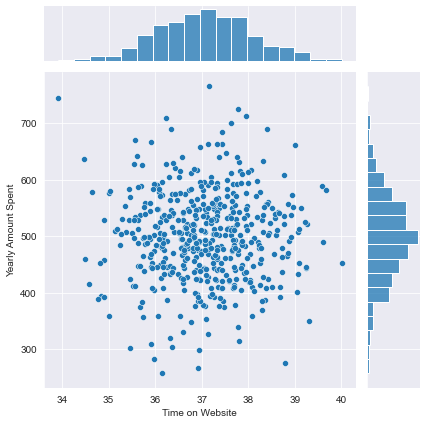

In [7]:
# Performing Exploratory Data Analysis
# Analyzing yearly amount spent vs time on website
sns.set_style('darkgrid')
sns.jointplot(x=customers['Time on Website'], y=customers['Yearly Amount Spent'], data=customers)

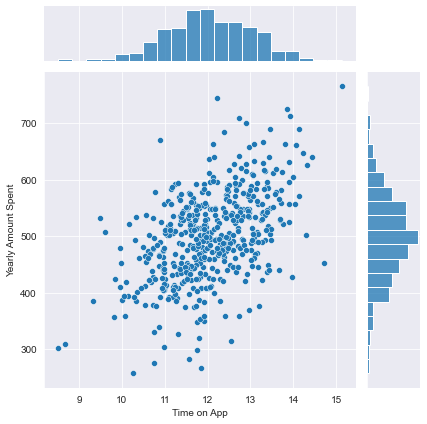

In [8]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

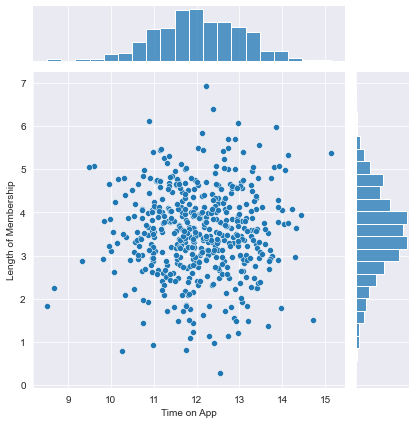

In [9]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers)

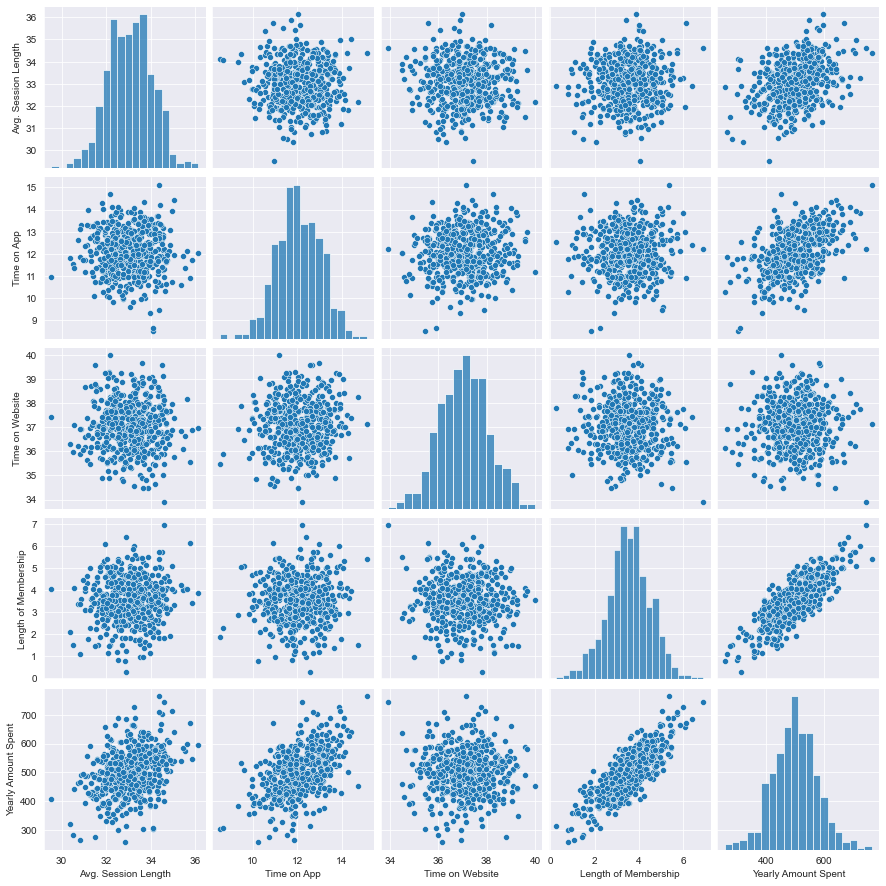

In [10]:
#analyzing these types of relationships all across the data set
sns.pairplot(customers)

The Length of Membership appears to be most corelated with the Yearly Amount Spent, so we can create linear model.

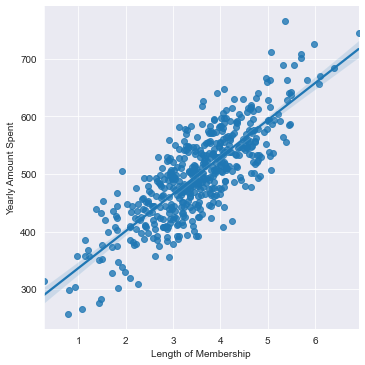

In [11]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

In [12]:
# independent variables 
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
# dependent variable
y = customers['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

Suppose you have the following regression equation: y = 3X + 5. In this equation, +3 is the coefficient, X is the predictor, and +5 is the constant.

Text(0.5, 0, 'y test')

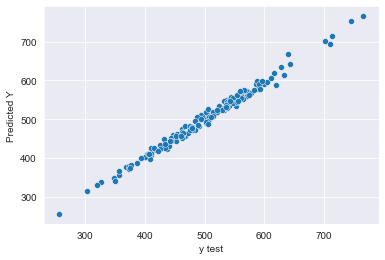

In [16]:
predictions = lm.predict(X_test)
sns.scatterplot(y = predictions, x = y_test)
plt.ylabel('Predicted Y')
plt.xlabel('y test')

In [17]:
#Evaluating the performance of the model 
from sklearn import metrics
print ('MSE : ', metrics.mean_squared_error(y_test, predictions))

MSE :  79.81305165097434


In [18]:
print ('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE :  8.933815066978628


In [19]:
print ('R^2: Variance Score is' , metrics.explained_variance_score(y_test,predictions))
#the model explains nearly 99% of the variance.

R^2: Variance Score is 0.9890771231889607


In terms of linear regression, variance is a measure of how far observed values differ from the average of predicted values, i.e., their difference from the predicted value mean. The goal is to have a value that is low.

c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

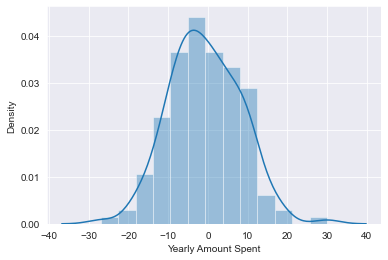

In [20]:
#Plotting a histogram of residuals
sns.distplot(y_test-predictions)

In [21]:
#Analyzing coefficients
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
